In [1]:
import os
import cv2

import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', Y_train.shape)
print('Testing  Data Shape   : ', X_test.shape)
print('Testing Labels Shape  : ', Y_test.shape)

Training Data Shape   :  (60000, 28, 28)
Training Labels Shape :  (60000,)
Testing  Data Shape   :  (10000, 28, 28)
Testing Labels Shape  :  (10000,)


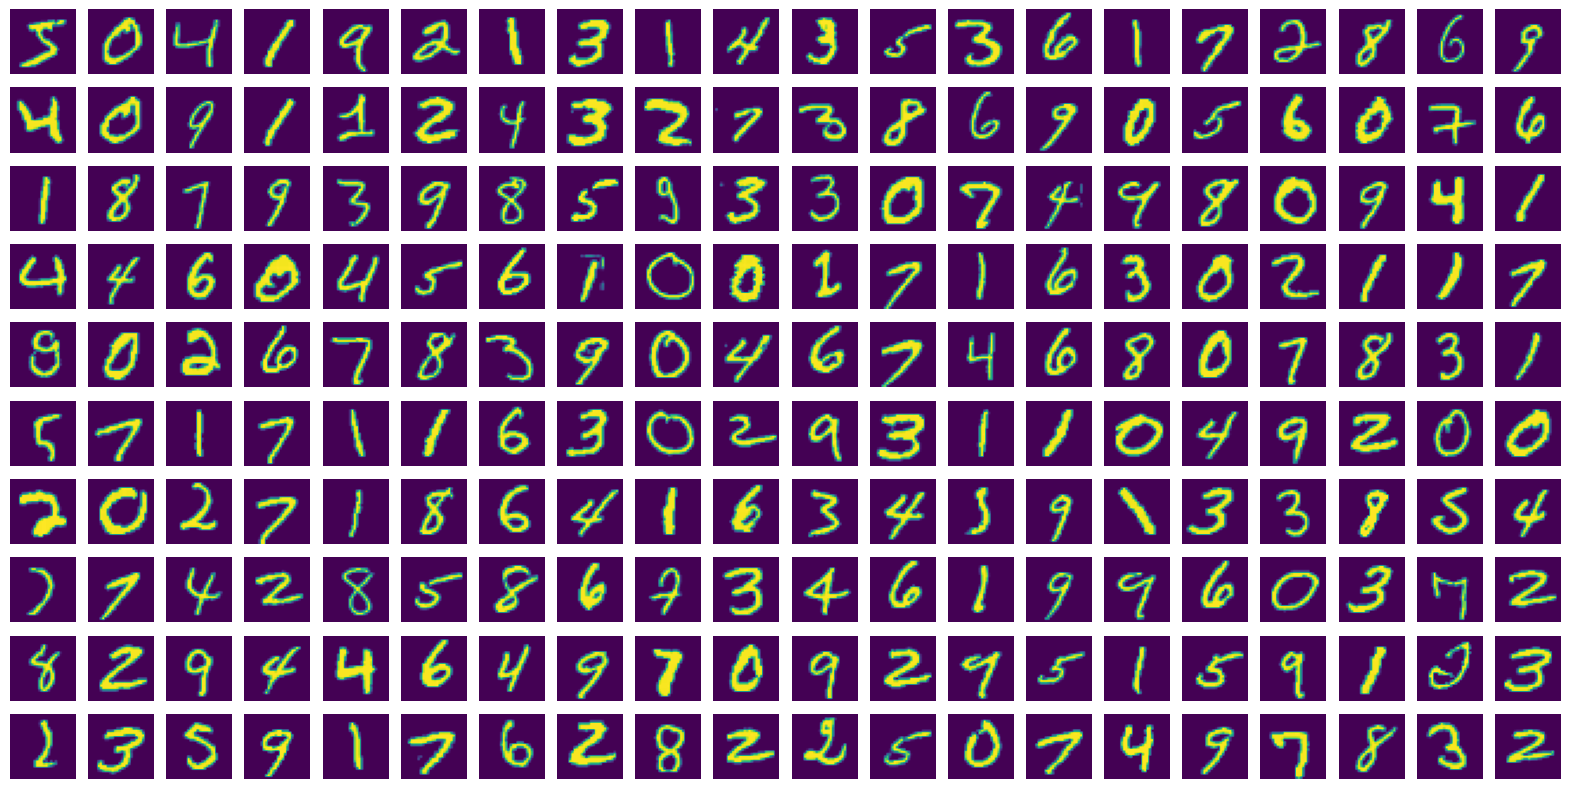

In [4]:
plt.figure(figsize = (20,10))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [5]:
x_train = X_train/255
x_test  = X_test/255

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Y_train, num_classes = 10)
y_test   = to_categorical(Y_test, num_classes = 10)

In [7]:
print('Training Data Shape     : ', X_train.shape)
print('Training Labels Shape   : ', y_train.shape)
print()
print('Testing  Data Shape     : ', X_test.shape)
print('Testing Labels Shape    : ', Y_test.shape)

Training Data Shape     :  (60000, 28, 28)
Training Labels Shape   :  (60000, 10)

Testing  Data Shape     :  (10000, 28, 28)
Testing Labels Shape    :  (10000,)


In [8]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [9]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #

In [10]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    batch_size = 1000,
    verbose = 1
)

Epoch 1/100
60/60 [==============================] - 5s 19ms/step - loss: 0.6650 - accuracy: 0.8183 - val_loss: 0.2673 - val_accuracy: 0.9219
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 0.2326 - accuracy: 0.9331 - val_loss: 0.1928 - val_accuracy: 0.9441
Epoch 3/100
60/60 [==============================] - 1s 9ms/step - loss: 0.1701 - accuracy: 0.9514 - val_loss: 0.1489 - val_accuracy: 0.9560
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 0.1306 - accuracy: 0.9628 - val_loss: 0.1254 - val_accuracy: 0.9640
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 0.1075 - accuracy: 0.9689 - val_loss: 0.1149 - val_accuracy: 0.9659
Epoch 6/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0902 - accuracy: 0.9740 - val_loss: 0.1015 - val_accuracy: 0.9699
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0762 - accuracy: 0.9782 - val_loss: 0.0936 - val_accuracy: 0.9726
Epoch 8/100

In [12]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

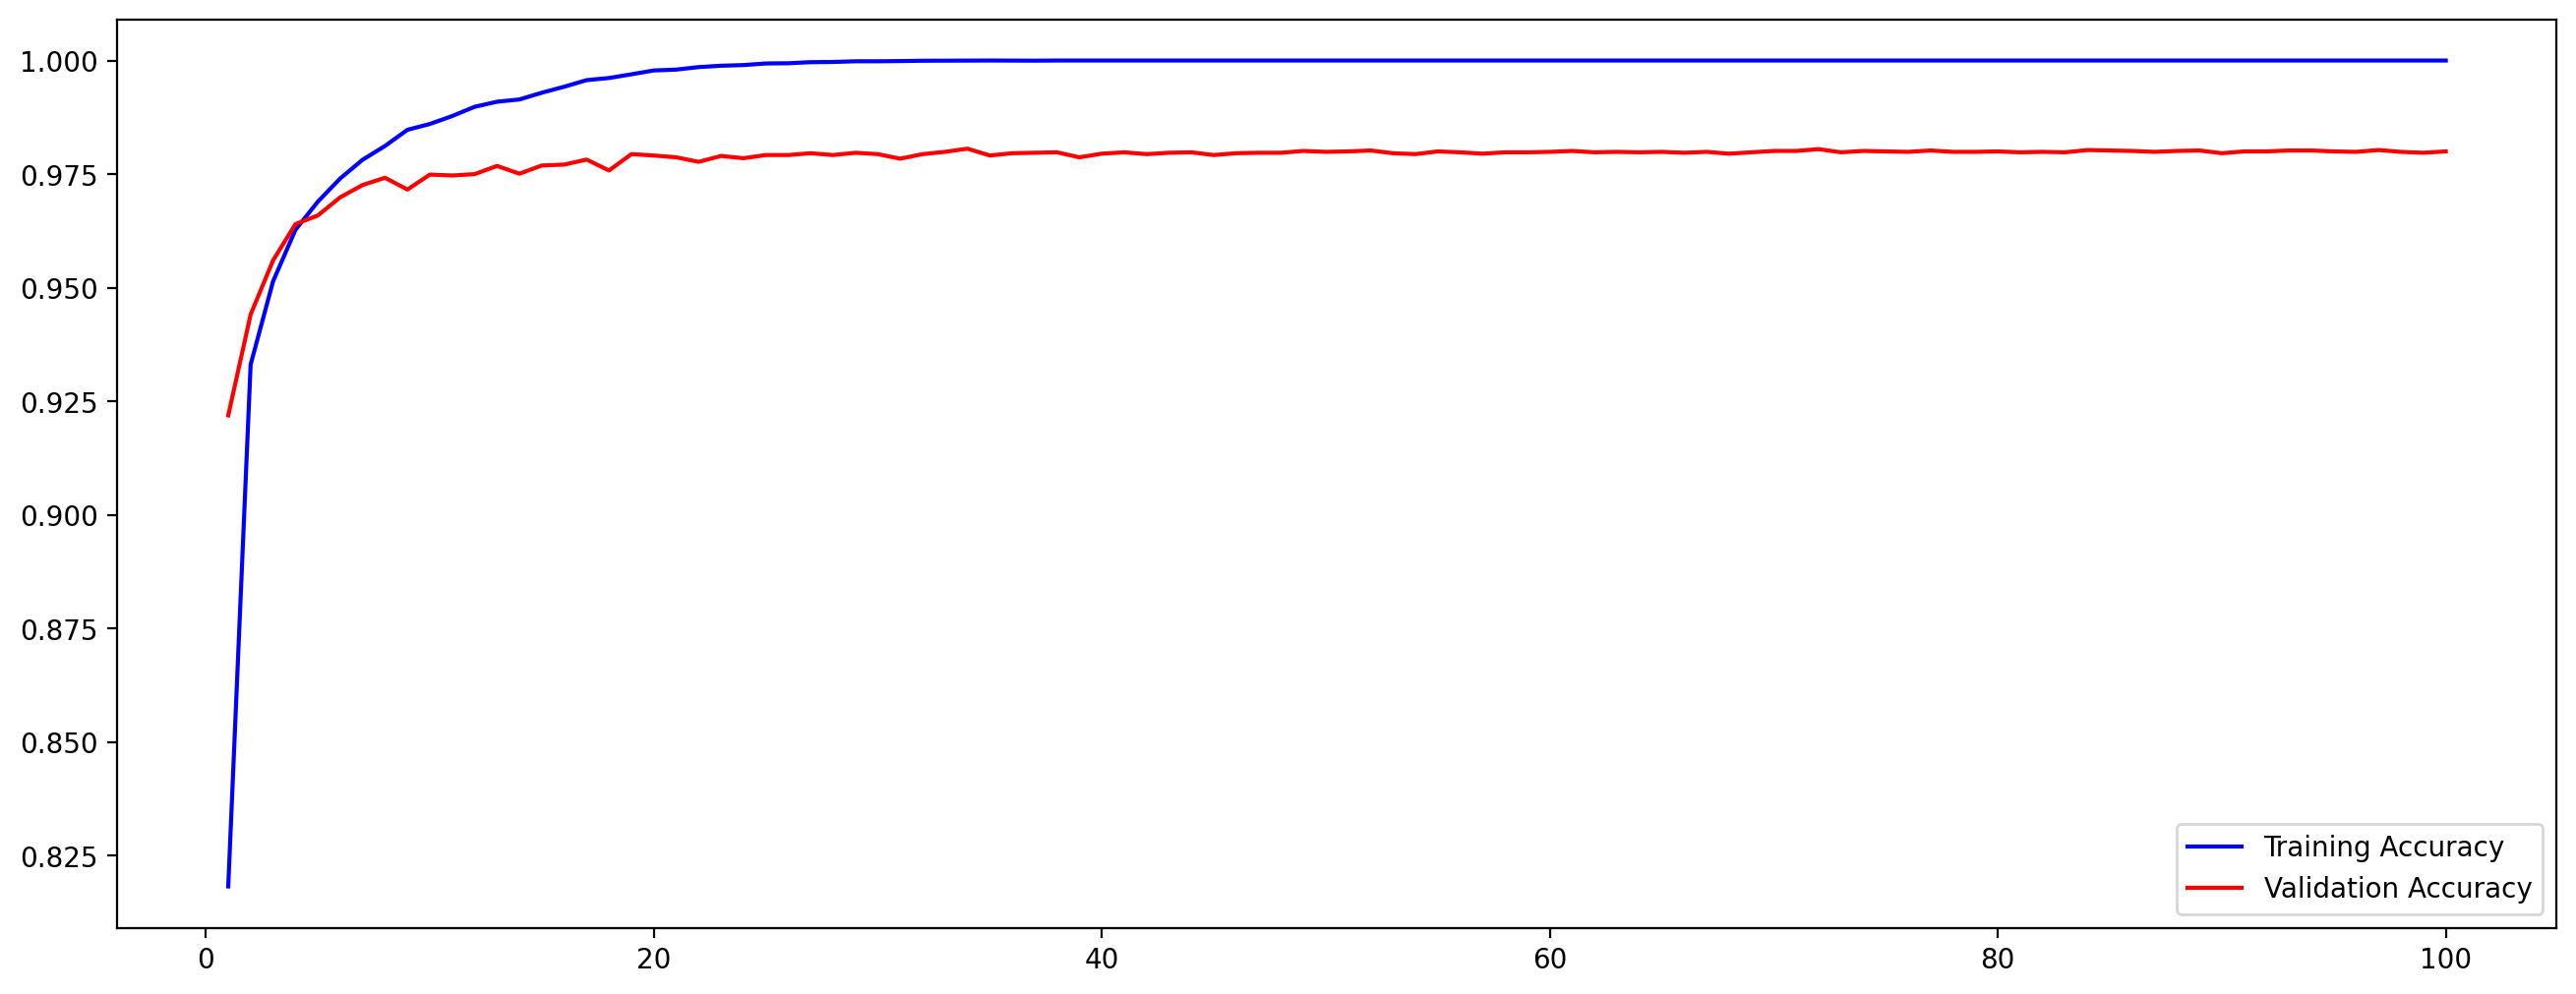

In [13]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

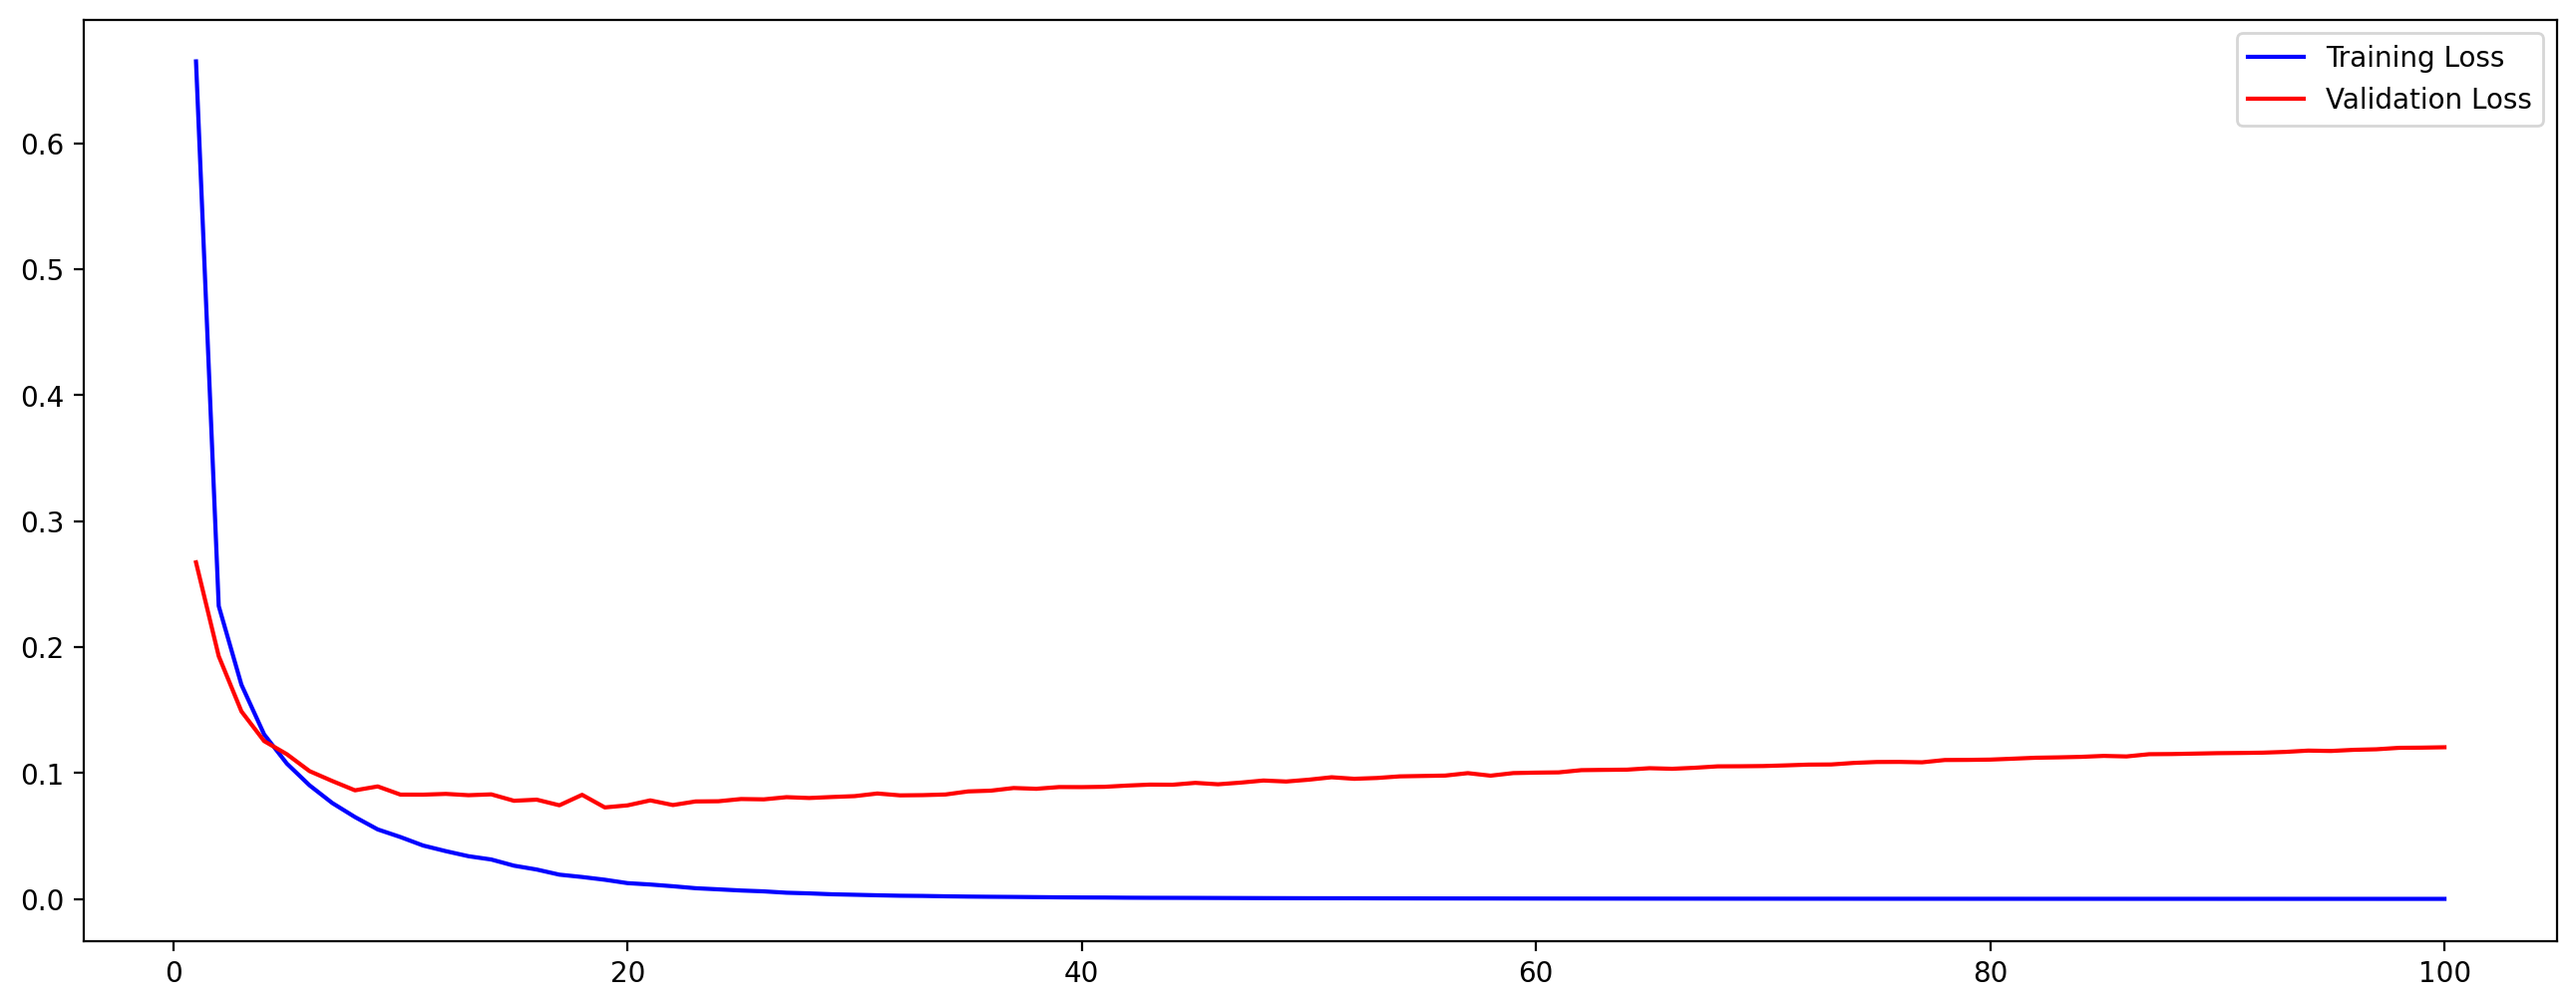

In [14]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

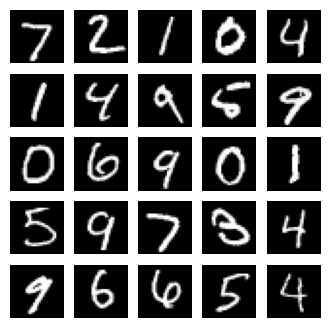

In [15]:
plt.figure(figsize = (4,4))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_test[i], cmap = 'gray')
  plt.axis('off')

In [16]:
def predict_digit(x):
  digit = model.predict(x)
  digit = np.argmax(digit)
  print('The digit is the given iamge is : ', digit)

In [17]:
predict_digit(x_test[0:1])

1/1 [==============================] - 0s 82ms/step
The digit is the given iamge is :  7
